In [1]:
import pandas as pd
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Input,Permute
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization,Conv2D,Conv1D,MaxPooling1D

Using TensorFlow backend.


In [2]:
Dataset_imgpath = 'D:\\Corel Dataset'

In [3]:
X_train = []
Y_train = []
X_validation = []
Y_validation = []
i=1
for path, _, files in os.walk(Dataset_imgpath):
    for file in files:
        if 'jpg' in file:
            if i <= 50:
                image = cv.imread(path + '\\' + file)
                image = cv.resize(image, (80,80))
                X_train.append(image)
                label = path.split(os.path.sep)[-1]
                Y_train.append(label)
                i=i+1
            elif 50 < i <= 100:
                image = cv.imread(path + '\\' + file)
                image = cv.resize(image, (80,80))
                X_validation.append(image)
                label = path.split(os.path.sep)[-1]
                Y_validation.append(label)
                i=i+1
                if i > 100:
                    i=1

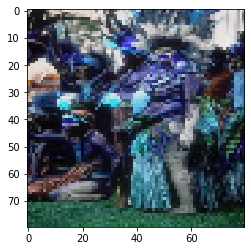

In [4]:
plt.imshow(X_train[5])

In [5]:
Y_train = np.array(Y_train)
X_train = np.array(X_train)

Y_validation = np.array(Y_validation)
X_validation = np.array(X_validation)

encoder = LabelEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train)
Y_train = np_utils.to_categorical(Y_train)

encoder.fit(Y_validation)
Y_validation = encoder.transform(Y_validation)
Y_validation = np_utils.to_categorical(Y_validation)

In [7]:
X_validation.shape

(500, 80, 80, 3)

In [606]:
X_train = X_train.astype('float32')
X_validation = X_validation.astype('float32')

X_train/=255.0
X_validation/=255.0

In [ ]:
aug = ImageDataGenerator(rotation_range=40, 
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip=True,
                        )
aug.fit(X_train)

In [676]:
model = Sequential()
model.add(Conv2D(32, (2,2),padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (2,2),padding='same', activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.add(Dropout(0.2))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [677]:
#history = model.fit(X_train,Y_train, epochs = 120, verbose=2, validation_data=(X_validation, Y_validation),batch_size=32)

In [678]:
history = model.fit_generator(aug.flow(X_train, Y_train),
                             validation_data=(X_validation, Y_validation),
                              steps_per_epoch=X_train.shape[0] / 5, 
                              epochs=40, 
                              verbose=2)

Epoch 1/40
 - 24s - loss: 4.0012 - accuracy: 0.4856 - val_loss: 0.9541 - val_accuracy: 0.6520
Epoch 2/40
 - 24s - loss: 4.0810 - accuracy: 0.5790 - val_loss: 0.9127 - val_accuracy: 0.6660
Epoch 3/40
 - 23s - loss: 3.6855 - accuracy: 0.6467 - val_loss: 1.1174 - val_accuracy: 0.6660
Epoch 4/40
 - 24s - loss: 3.6660 - accuracy: 0.6650 - val_loss: 1.0223 - val_accuracy: 0.6840
Epoch 5/40
 - 23s - loss: 3.5859 - accuracy: 0.6784 - val_loss: 1.2817 - val_accuracy: 0.6280
Epoch 6/40
 - 23s - loss: 3.5111 - accuracy: 0.7046 - val_loss: 1.1167 - val_accuracy: 0.7100
Epoch 7/40
 - 23s - loss: 3.3370 - accuracy: 0.7132 - val_loss: 1.1585 - val_accuracy: 0.6940
Epoch 8/40
 - 23s - loss: 3.4241 - accuracy: 0.7173 - val_loss: 1.1751 - val_accuracy: 0.6900
Epoch 9/40
 - 23s - loss: 3.3006 - accuracy: 0.7343 - val_loss: 1.0379 - val_accuracy: 0.7400
Epoch 10/40
 - 24s - loss: 3.4398 - accuracy: 0.7269 - val_loss: 1.3457 - val_accuracy: 0.6880
Epoch 11/40
 - 24s - loss: 3.5322 - accuracy: 0.7279 - val_

In [679]:
loss,acc = model.evaluate(X_validation, Y_validation, batch_size=32)
print(acc)

500/500 [==============================] - 1s 2ms/step
0.7879999876022339


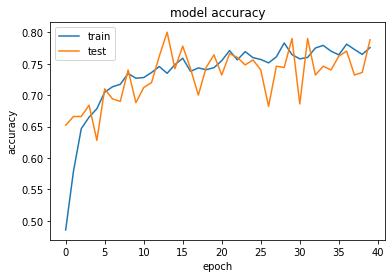

In [680]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [681]:
y_predict = model.predict(X_validation)

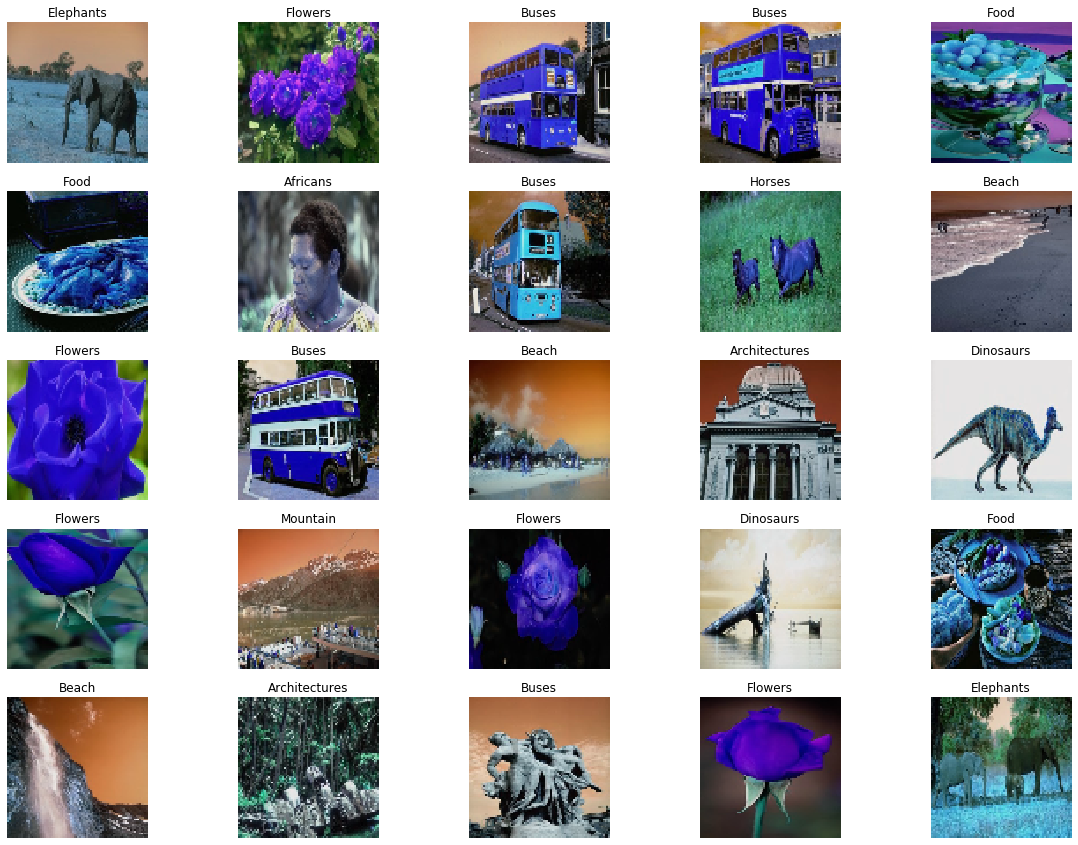

In [689]:
index = np.random.randint(0, len(X_validation) - 1, size= 25)
plt.figure(figsize=(20,15))
for i, ind in enumerate(index, 1):
    img = X_validation[ind]
    lab = Y_validation[ind]
    
    tmp = np.expand_dims(img, axis=0)
    proba = model.predict(tmp)[0]
    idx = np.argmax(proba)
    pred = encoder.classes_[idx]

    string = pred
    plt.subplot(5, 5, i)
    plt.title(string)
    plt.axis('off')
    plt.imshow(img)